# **Project at Unified Mentor**

 

**Objective**:


`To predict whether an employee will leave the company (attrition) based on various features such as age, job satisfaction, salary, etc.`






***Created by: Rajat Singh***


In [1]:
#installing Required Libraries

# !pip install requirements.txt

In [2]:
#Required Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
import os , sys
import plotly.io as pio
pio.renderers.default = 'notebook'

warnings.filterwarnings("ignore")

In [3]:
file_path = os.path.join(os.getcwd() , "dataset/HRDataset_v14.csv") #file path of dataset
df= pd.read_csv(file_path) #csv dataset as dataframe

In [4]:
df.shape

(311, 36)

**Very small Dataset**

In [5]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [7]:
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [8]:
df[["GenderID" , "Sex"]] # one represented as Male and Zero  as Female 

,GenderID,Sex
0,1,M
1,1,M
2,0,F
3,0,F
4,0,F
...,...,...
306,1,M
307,0,F
308,0,F
309,0,F


In [ ]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [10]:
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

**We can see that there are more than 200 null values inside DateofTermination column .**


`Lets first Observe data then check if there are any Ouliers  Present in each Numericals column . I will remove outliers by Using IQR method  Values Lower than 25 % Quartile and More than 75 % Quartile Values`

In [11]:
# First Lets see there is any duplicated Values or not
df.duplicated().sum()

0

In [12]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

Output:
df.isnull().sum(): Displays each column with the count of missing values, revealing data quality issues.
df.duplicated().sum(): Shows the number of duplicate rows, if any.
Explanation: Identifies missing data that may need handling (imputation or removal) and checks for duplicates to ensure data integrity.

**Salary is most Important Features based on this  i will do further analysis and Compare each column with salary  to find Outliers.Based on this analysis i will consider which features are most important for Model training**

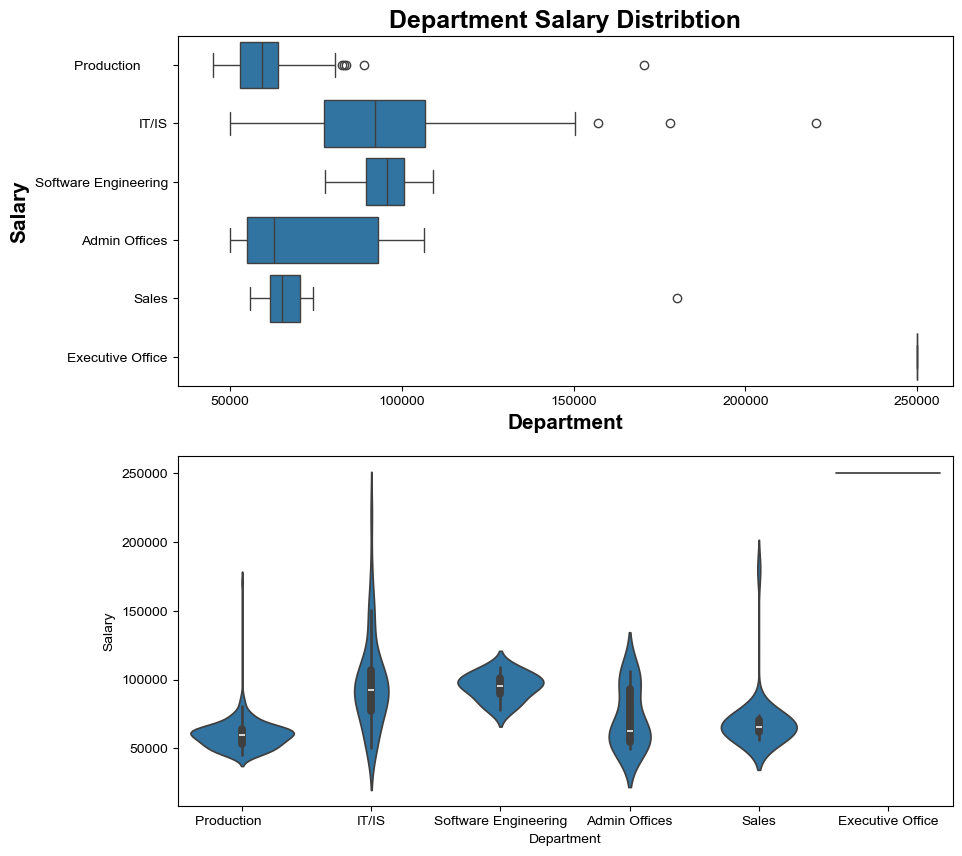

In [14]:
#Lets Observe Outliers and Handle it using Lower bound and Higher bound , we will keep values between 25 to 75 perecent 

fig , (ax1, ax2)=plt.subplots(2 , 1 , figsize=(10,10))
sns.set_palette("Set2")
sns.set_style("darkgrid")
sns.boxplot(data=df , x="Salary" , y="Department" , ax=ax1)
ax1.set_xlabel("Department" , fontsize=15 , fontweight="bold")
ax1.set_ylabel("Salary" , fontsize=15 , fontweight="bold")
ax1.set_title("Department Salary Distribtion" , fontsize=18 , fontweight="bold")
sns.violinplot(data=df , x="Department" , y="Salary"   , ax=ax2 )
ax1.set_xlabel("Department" , fontsize=15 , fontweight="bold")
ax1.set_ylabel("Salary" , fontsize=15 , fontweight="bold")
ax1.set_title("Department Salary Distribtion" , fontsize=18 , fontweight="bold")
fig.show()

**IT /IS sector and Production Department have high salary  , there salary will impact model training and Accuracy.**

In [15]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


**Analysis  Based on Gender**

In [16]:
fig = px.box(df , 
             y="Salary" ,
             x="Sex"  , 
             color="Sex" , 
             title="<b>Salary Distribution Based on Gender<b>" ,
             width=1000,
             height=500)


fig.show()

**Lets Observe  Average Salary based on Postion and Department**

In [17]:
postion_wise_salary  = df.groupby("Position")["Salary"].mean().sort_values(ascending=False).reset_index()

postion_wise_salary

,Position,Salary
0,President & CEO,250000.000000
1,CIO,220450.000000
2,Director of Sales,180000.000000
3,IT Director,178000.000000
4,Director of Operations,170500.000000
5,IT Manager - Infra,157000.000000
6,Data Architect,150290.000000
7,IT Manager - DB,144959.500000
8,IT Manager - Support,138888.000000
9,Principal Data Architect,120000.000000


In [18]:
custom_colors = [
    "#636EFA", "#EF553B", "#00CC96", "#AB63FA", "#FFA15A", "#19D3F3", "#FF6692", "#B6E880",
    "#FF97FF", "#FECB52", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD", "#8C564B",
    "#E377C2", "#7F7F7F", "#BCBD22", "#17BECF", "#393b79", "#5254a3", "#6b6ecf", "#9c9ede",
    "#637939", "#8ca252", "#b5cf6b", "#cedb9c", "#8c6d31", "#bd9e39", "#e7ba52", "#e7cb94",
    "#843c39", "#ad494a", "#d6616b", "#e7969c", "#7b4173", "#a55194", "#ce6dbd", "#de9ed6"
]

fig = px.bar(postion_wise_salary , 
            y="Position", 
            x="Salary" ,
            color="Position",
            height=650, 
            width=1300,
            color_discrete_sequence = custom_colors)


fig.show()

# **Terminated Employees**

Text(0.5, 1.0, 'Terminated Department Distribution')

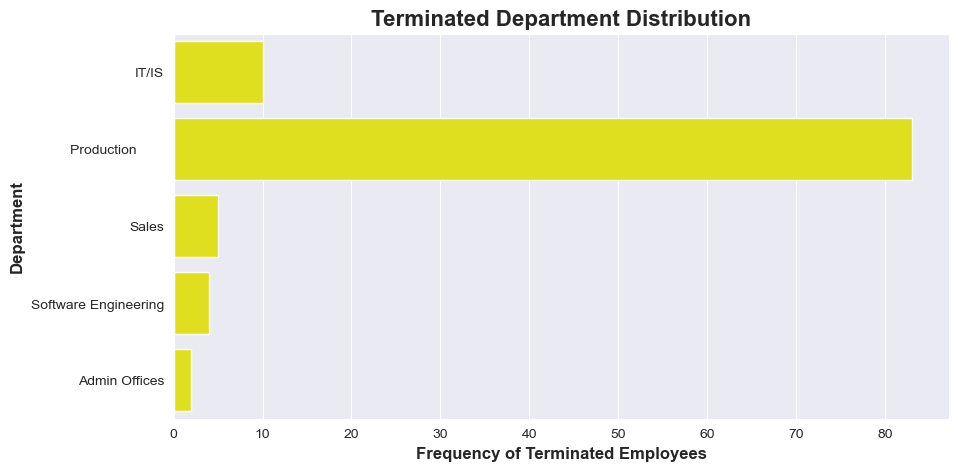

In [19]:
terminated_emp = df[df["Termd"]==1]
plt.figure(figsize=(10,5))
sns.set_palette("Set2")
sns.set_style("darkgrid")
sns.countplot(data=terminated_emp["Department"] , color="yellow")
plt.xlabel("Frequency of Terminated Employees" ,fontsize=12 , fontweight="bold")
plt.ylabel("Department" ,fontsize=12 , fontweight="bold")
plt.title('Terminated Department Distribution' , fontsize=16 , fontweight="bold")

# **Active Employees**

Text(0.5, 1.0, 'Active Department Distribution')

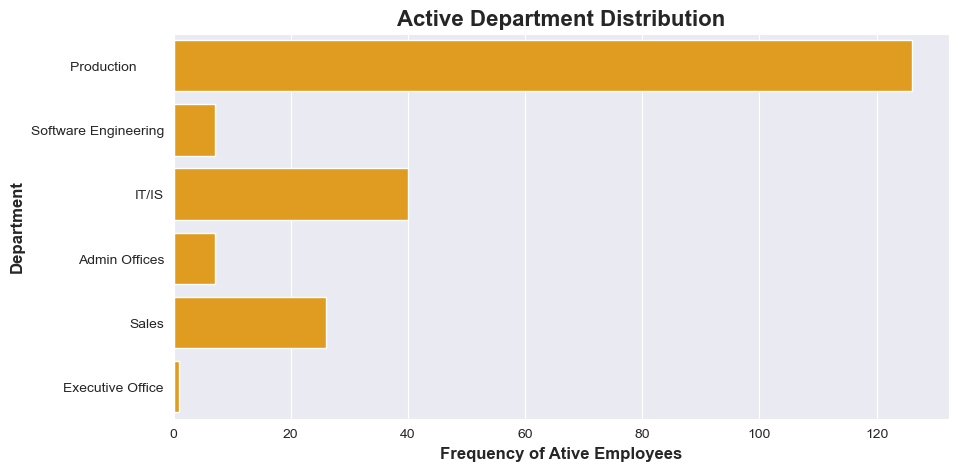

In [20]:
active_emp = df[df["Termd"]==0]
plt.figure(figsize=(10,5))
sns.set_palette("Set2")
sns.set_style("darkgrid")
sns.countplot(data=active_emp["Department"] , color="orange")
plt.xlabel("Frequency of Ative Employees" ,fontsize=12 , fontweight="bold")
plt.ylabel("Department" ,fontsize=12 , fontweight="bold")
plt.title('Active Department Distribution' , fontsize=16 , fontweight="bold")

In [21]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

# **Terminated Managers by name**

In [22]:
term_manager = df[df["Termd"]==1]
term_manager

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
10,"Baczenski, Rachael",10252,1,1,0,5,5,3,1,54670,...,David Stanley,14.0,Diversity Job Fair,Fully Meets,4.20,4,0,1/30/2016,0,12
11,"Barbara, Thomas",10242,1,1,1,5,5,3,1,47211,...,Kissy Sullivan,20.0,Diversity Job Fair,Fully Meets,4.20,3,0,5/6/2016,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,"Wilber, Barry",10048,1,1,1,5,5,3,0,55140,...,Amy Dunn,11.0,Website,Fully Meets,5.00,3,0,2/15/2015,0,7
302,"Wilkes, Annie",10204,0,2,0,5,5,3,0,58062,...,Ketsia Liebig,19.0,Google Search,Fully Meets,3.60,5,0,2/6/2011,0,9
303,"Williams, Jacquelyn",10264,0,0,0,5,5,3,1,59728,...,Ketsia Liebig,19.0,Diversity Job Fair,Fully Meets,4.30,4,0,6/2/2014,0,16
304,"Winthrop, Jordan",10033,0,0,1,5,5,4,0,70507,...,Brannon Miller,12.0,LinkedIn,Exceeds,5.00,3,0,1/19/2016,0,7


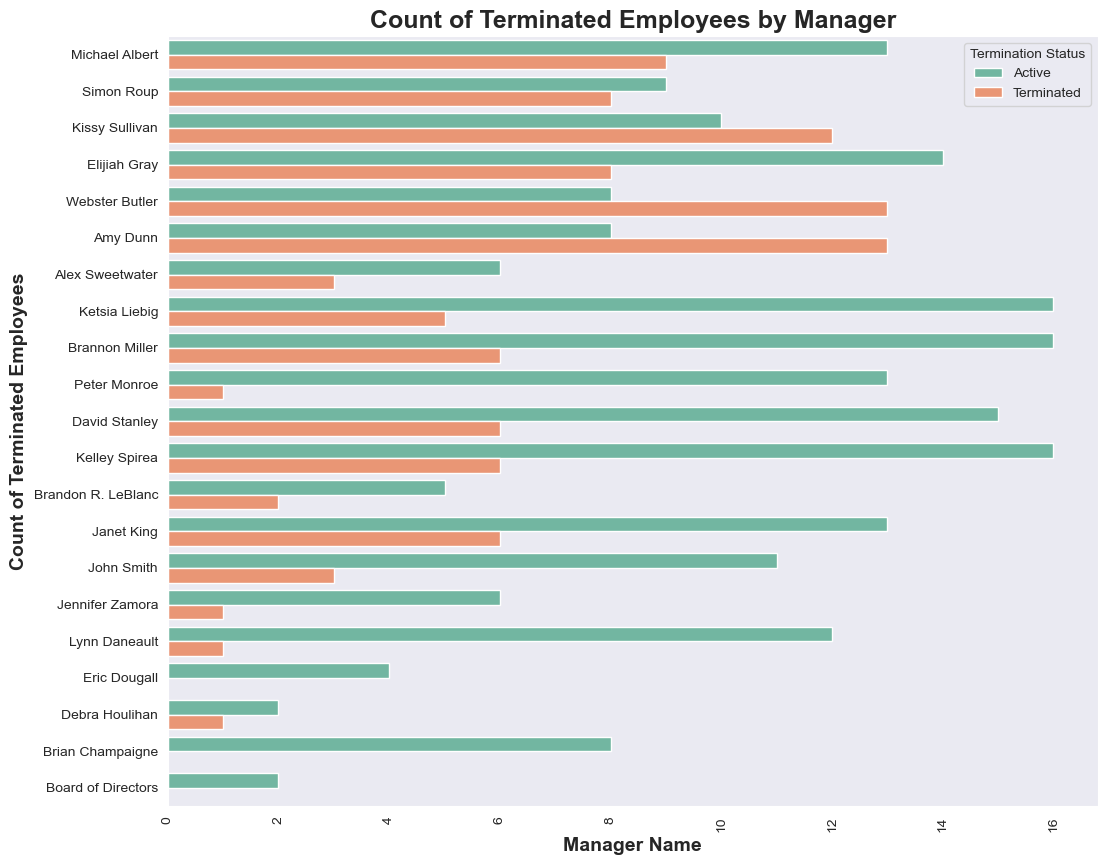

In [23]:
plt.figure(figsize=(12,10))
sns.set_palette("Set2")
sns.set_style("dark")
sns.countplot(data=df , y="ManagerName" , hue="Termd")
plt.title("Count of Terminated Employees by Manager" , fontsize=18 , fontweight="bold")
plt.xlabel("Manager Name" , fontsize=14 , fontweight="bold")
plt.ylabel("Count of Terminated Employees" , fontsize=14 , fontweight="bold")
plt.xticks(rotation=90)
plt.legend(title="Termination Status", labels=["Active", "Terminated"])
plt.show()

# **Terminated manager by their name**

In [24]:
#calculating Percentage of Terminated Employees for each manager name
terminated_mana_by_name = df[df["Termd"]==1].groupby("ManagerName").size() / (df.groupby("ManagerName").size())*100
terminated_mana_by_name=terminated_mana_by_name.reset_index(name="Terminated percentage")

In [25]:
terminated_mana_by_name

,ManagerName,Terminated percentage
0,Alex Sweetwater,33.333333
1,Amy Dunn,61.904762
2,Board of Directors,NaN
3,Brandon R. LeBlanc,28.571429
4,Brannon Miller,27.272727
5,Brian Champaigne,NaN
6,David Stanley,28.571429
7,Debra Houlihan,33.333333
8,Elijiah Gray,36.363636
9,Eric Dougall,NaN


In [26]:
# Create the bar chart
fig = px.bar(
    terminated_mana_by_name,
    x='ManagerName',
    y='Terminated percentage',
    color='ManagerName',
    text='Terminated percentage',
    text_auto=True  # Automatically adjust text display
)

# Update traces for better visualization
fig.update_traces(
    textfont=dict(size=16),  # Increase font size of text
    textposition='outside'  # Position text outside the bars
)

# Update layout for improved aesthetics
fig.update_layout(
    title="Termination Percentage by Manager",
    title_font=dict(size=18),  # Increase title font size
    xaxis_title="Manager Name",  # Correct axis title
    yaxis_title="Terminated Percentage (%)",  # Correct axis title
    xaxis=dict(tickangle=45),  # Rotate x-axis labels for better readability
    yaxis=dict(showgrid=True),  # Show grid lines for easier interpretation
    plot_bgcolor='rgba(0,0,0,0)',  # Set background color to transparent
    margin=dict(l=40, r=40, t=40, b=40)  # Add margins for better spacing
)

# Show the plot
fig.show()


In [27]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

# **Lets Viualize Performance Score**

In [28]:
# Generate counts for each PerformanceScore
performance_score = df["PerformanceScore"].value_counts().reset_index()
performance_score.columns = ["PerformanceScore", "count"]  # Rename columns
performance_score = performance_score.sort_values("count", ascending=False)

# Enhanced Bar Chart
fig1 = px.bar(
    performance_score,
    x="PerformanceScore",
    y="count",
    color="PerformanceScore",
    title="<b>Distribution of Performance Scores</b>",
    height=400,
    width=1000,
    text="count"  # Show counts on top of bars
)

# Update bar chart layout and style
fig1.update_layout(
    title_font_size=24,
    xaxis_title="Performance Score",
    yaxis_title="Count",
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    legend_title_text="Performance Score",
    title_x=0.5  # Center title
)

# Increase text size for the bar labels and add an outline for better readability
fig1.update_traces(
    textposition='outside',
    textfont_size=14,
    marker_line_width=1.5,  # Outline bars for better contrast
    marker_line_color="black"
)

fig1.show()

# Enhanced Pie Chart
fig2 = px.pie(
    performance_score,
    names="PerformanceScore",
    values="count",
    title="<b>Performance Score Distribution</b>",
    height=400,
    width=1000,
    hole=0.3,  # Convert pie chart to donut chart
    color_discrete_sequence=px.colors.sequential.Blues  # Custom color palette
)

# Update pie chart layout for better visibility
fig2.update_traces(
    textposition="inside",
    textinfo="percent+label",  # Show both percentage and label
    textfont_size=16,
    marker=dict(line=dict(color="black", width=1.5))  # Add border for clarity
)

fig2.update_layout(
    title_font_size=24,
    title_x=0.5  # Center title
)

fig2.show()


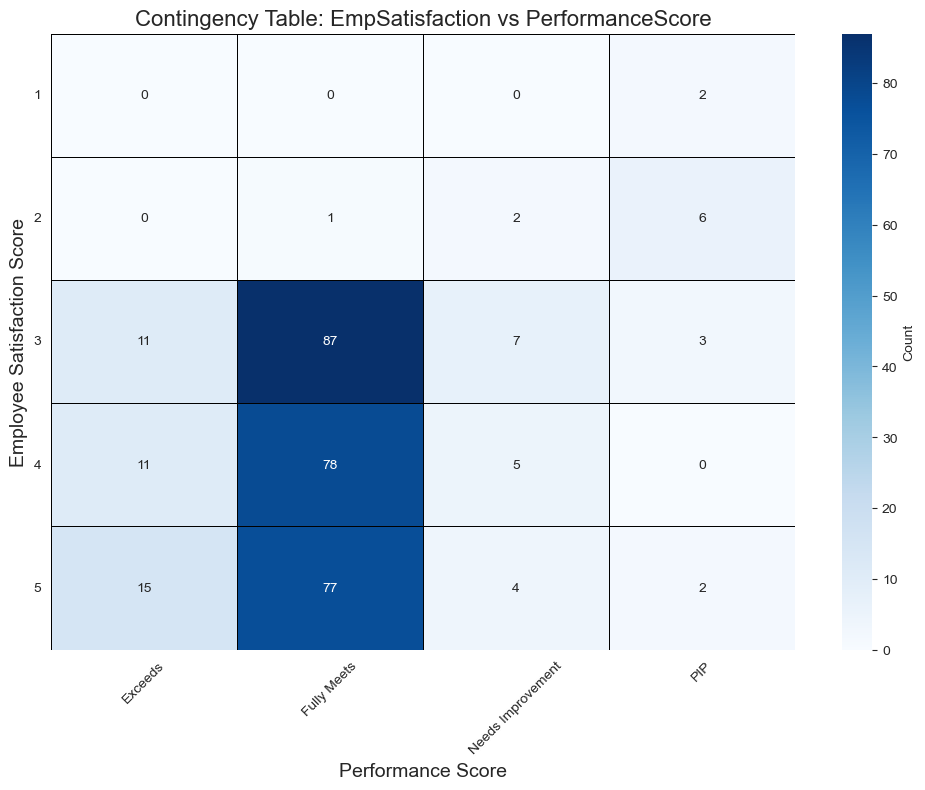

In [29]:
# Create the contingency table
contingency_table = pd.crosstab(df['EmpSatisfaction'], df['PerformanceScore'])

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(
    contingency_table,
    annot=True,  # Show counts in each cell
    fmt='d',     # Format of annotations
    cmap='Blues',  # Color palette
    linewidths=0.5,  # Lines between cells
    linecolor='black',  # Color of the lines
    cbar_kws={'label': 'Count'}  # Color bar label
)

# Set labels and title
plt.xlabel('Performance Score', fontsize=14)
plt.ylabel('Employee Satisfaction Score', fontsize=14)
plt.title('Contingency Table: EmpSatisfaction vs PerformanceScore', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal

# Show the plot
plt.show()


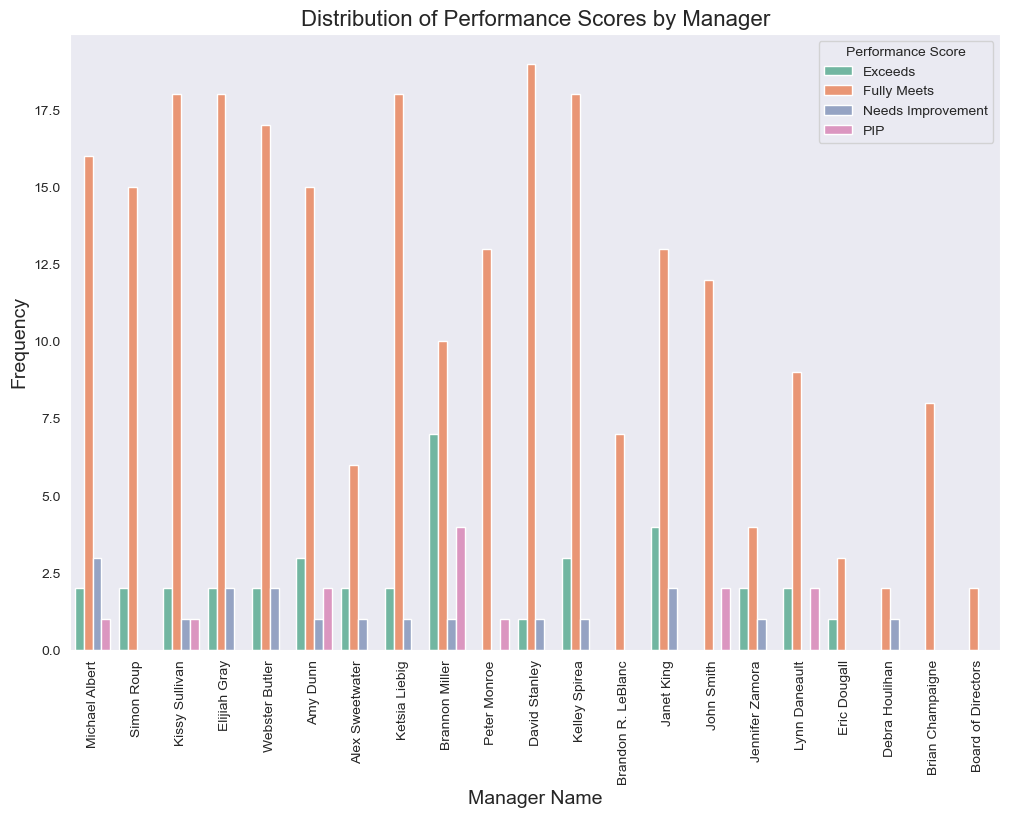

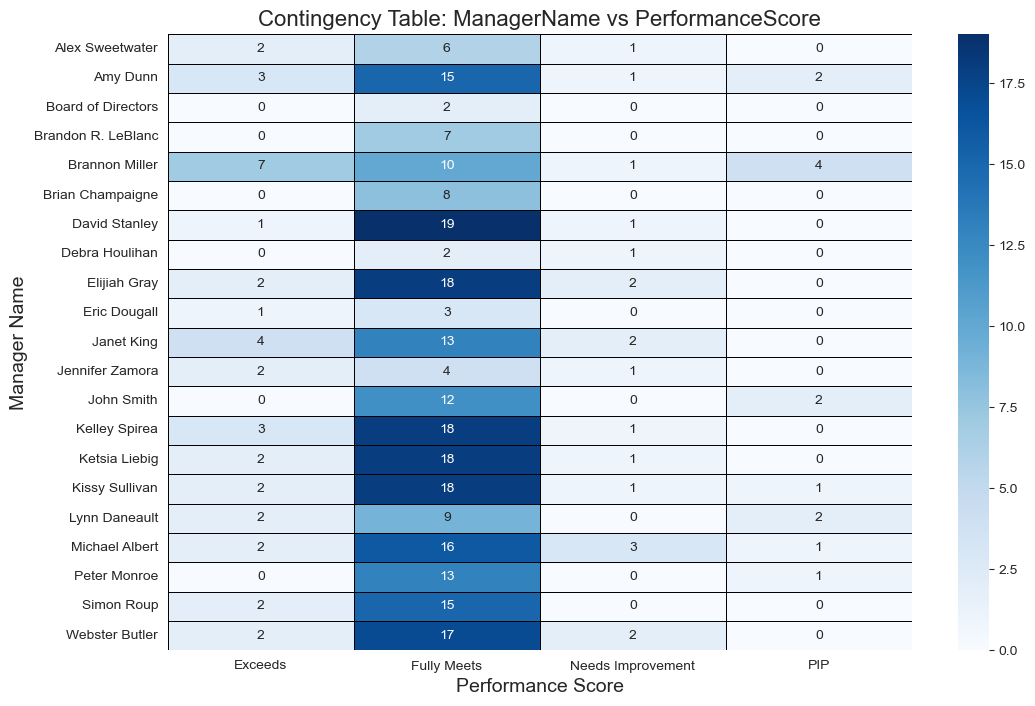

Chi-squared statistic: 67.00
p-value: 0.2494
There is no statistically significant association between ManagerName and PerformanceScore.


In [30]:
from scipy.stats import chi2_contingency

# Visualize the distribution of Performance Scores by ManagerName
plt.figure(figsize=(12, 8))
sns.countplot(x='ManagerName', hue='PerformanceScore', data=df)
plt.xlabel('Manager Name', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Performance Scores by Manager', fontsize=16)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Performance Score')  # Add legend title for clarity
plt.show()

# Create a contingency table to analyze the relationship between ManagerName and PerformanceScore
contingency_table = pd.crosstab(df['ManagerName'], df['PerformanceScore'])

# Visualize the contingency table using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    contingency_table,
    annot=True,  # Show counts in each cell
    cmap='Blues',  # Color palette
    fmt='d',  # Format of annotations
    linewidths=0.5,  # Width of lines between cells
    linecolor='black'  # Color of the lines
)
plt.xlabel('Performance Score', fontsize=14)
plt.ylabel('Manager Name', fontsize=14)
plt.title('Contingency Table: ManagerName vs PerformanceScore', fontsize=16)
plt.show()

# Perform a chi-squared test to determine if there's a significant association between ManagerName and PerformanceScore
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-squared statistic: {chi2:.2f}')
print(f'p-value: {p:.4f}')

# Interpretation of the p-value
if p < 0.05:
    print('There is a statistically significant association between ManagerName and PerformanceScore.')
else:
    print('There is no statistically significant association between ManagerName and PerformanceScore.')


# **Lets Check Termination Reason for each Department**

In [31]:
termination_reson = df["TermReason"].value_counts()
termination_reson


TermReason
N/A-StillEmployed                   207
Another position                     20
unhappy                              14
more money                           11
career change                         9
hours                                 8
attendance                            7
return to school                      5
relocation out of area                5
no-call, no-show                      4
military                              4
retiring                              4
performance                           4
maternity leave - did not return      3
medical issues                        3
Learned that he is a gangster         1
Fatal attraction                      1
gross misconduct                      1
Name: count, dtype: int64

<Axes: ylabel='TermReason'>

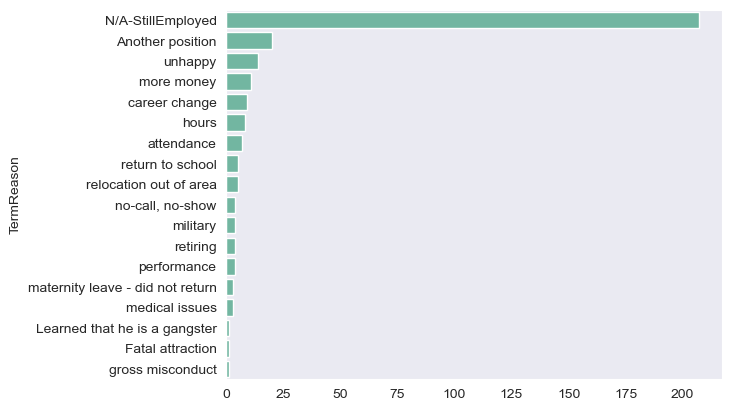

In [32]:
sns.barplot(y=termination_reson.index , x=termination_reson.values)

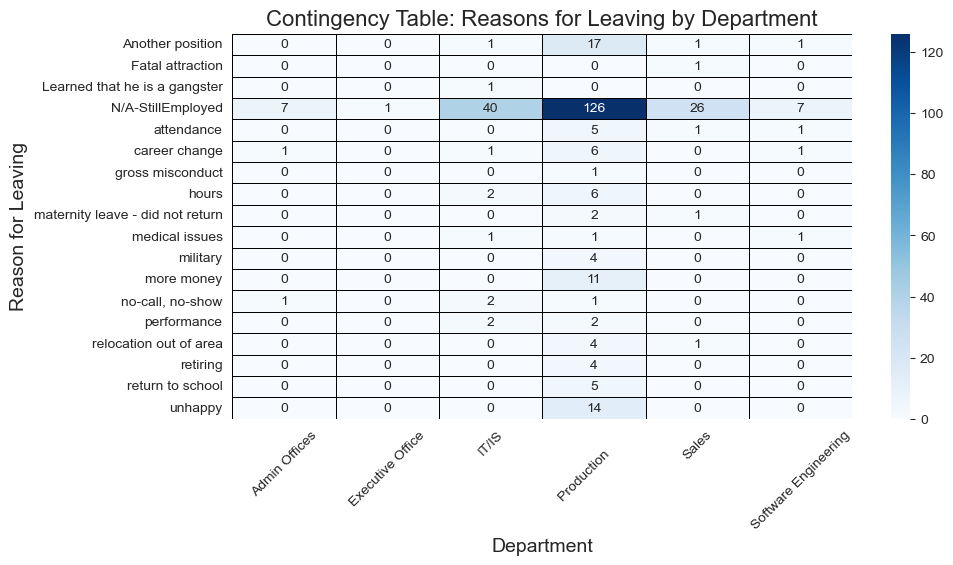

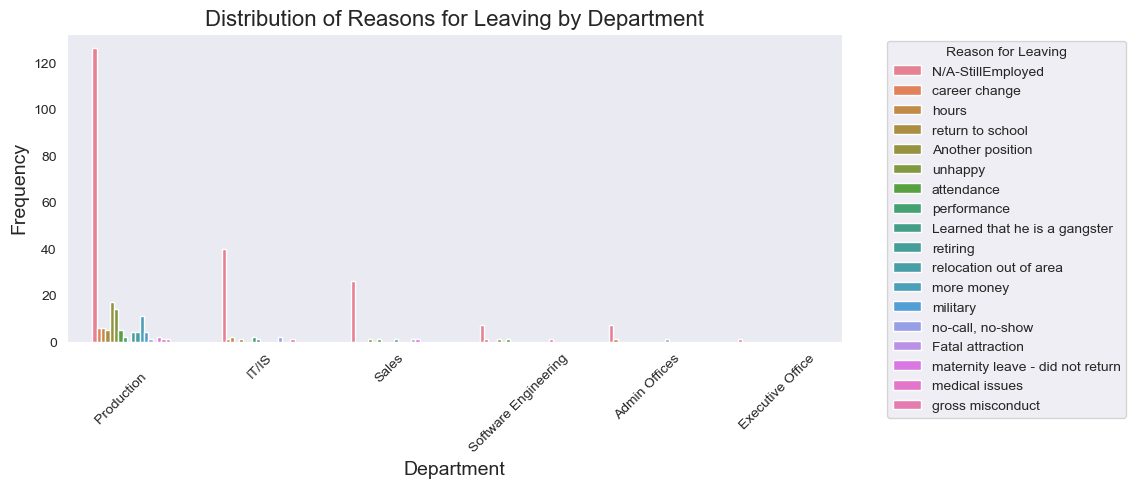

In [33]:
contingency_table = pd.crosstab(df['TermReason'], df['Department'])

# Visualize the contingency table using a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(
    contingency_table,
    annot=True,  # Show counts in each cell
    cmap='Blues',  # Color palette
    fmt='d',  # Format of annotations
    linewidths=0.5,  # Width of lines between cells
    linecolor='black'  # Color of the lines
)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Reason for Leaving', fontsize=14)
plt.title('Contingency Table: Reasons for Leaving by Department', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Optionally, visualize the distribution of reasons by department using countplot
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Department', hue='TermReason', order=df['Department'].value_counts().index , width=0.6)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Reasons for Leaving by Department', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Reason for Leaving', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
plt.show()


# **Lets Check Employee Satisfaction by Manager name**

In [ ]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [35]:
df[["EmpSatisfaction" , "ManagerName"]]

,EmpSatisfaction,ManagerName
0,5,Michael Albert
1,3,Simon Roup
2,3,Kissy Sullivan
3,5,Elijiah Gray
4,4,Webster Butler
...,...,...
306,4,Kissy Sullivan
307,2,Brannon Miller
308,5,Janet King
309,3,Simon Roup


In [36]:
#Lets plot Employee Satisfaction by Mangager 
employee_satisfaction=df[["ManagerName" , "EmpSatisfaction"]]

fig = px.box(employee_satisfaction , 
             x="ManagerName" , 
             y="EmpSatisfaction" , 
             color="ManagerName" , 
             title="<b> Employee Satisfaction by Manager Name" , 
             width=1000 ,
             height=500 , 
             )


fig.show()

In [37]:
avg_employee_satisfaction = df.groupby("ManagerName")["EmpSatisfaction"].mean().reset_index(name="EmpSatisfaction(Mean)") #Average
std_employee_satisfaction = df.groupby("ManagerName")["EmpSatisfaction"].std().reset_index(name="EmpSatisfaction(std)")  #Std


fig1 = px.bar(avg_employee_satisfaction , 
             x="ManagerName" ,
             y="EmpSatisfaction(Mean)" , 
             color="ManagerName" , 
             text="EmpSatisfaction(Mean)" , 
             title="<b>Average Employee Satisfaction<b>"
             )
# Update traces for better visualization
fig1.update_traces(
    textfont=dict(size=16),  # Increase font size of text
    textposition='outside'  # Position text outside the bars
)

fig1.show()
#Ploting Stanadard Deviation of Employee Satisfaction
fig2 = px.bar(std_employee_satisfaction , 
             x="ManagerName" ,
             y="EmpSatisfaction(std)" , 
             color="ManagerName" , 
             text="EmpSatisfaction(std)" , 
             title="<b>Stanadard Deviation  Employee Satisfaction by Manager<b>"
             )
# Update traces for better visualization
fig2.update_traces(
    textfont=dict(size=16),  # Increase font size of text
    textposition='outside'  # Position text outside the bars
)

fig2.show()

In [38]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [39]:
print(df["RecruitmentSource"].unique())
recruitment_source = df["RecruitmentSource"].value_counts().reset_index()
recruitment_source

['LinkedIn' 'Indeed' 'Google Search' 'Employee Referral'
 'Diversity Job Fair' 'On-line Web application' 'CareerBuilder' 'Website'
 'Other']


,RecruitmentSource,count
0,Indeed,87
1,LinkedIn,76
2,Google Search,49
3,Employee Referral,31
4,Diversity Job Fair,29
5,CareerBuilder,23
6,Website,13
7,Other,2
8,On-line Web application,1


# **Lets Analyze Recruitment Source**

In [40]:
fig = px.bar(recruitment_source , 
             x="RecruitmentSource" , 
             y="count" , 
             color="RecruitmentSource" , 
             title="<b>Recruitment Source Distribution<b>" , 
             width=1200 , 
             height=500) 

fig.show()

fig2 = px.pie(recruitment_source , 
             names="RecruitmentSource" , 
             values="count" , 
             color="RecruitmentSource" , 
             title="<b>Pie Distribution of Recruitment Source<b>" ,
             width=1200 , 
             height=500) 

fig2.show()            


# **Recruitment Source by Department**

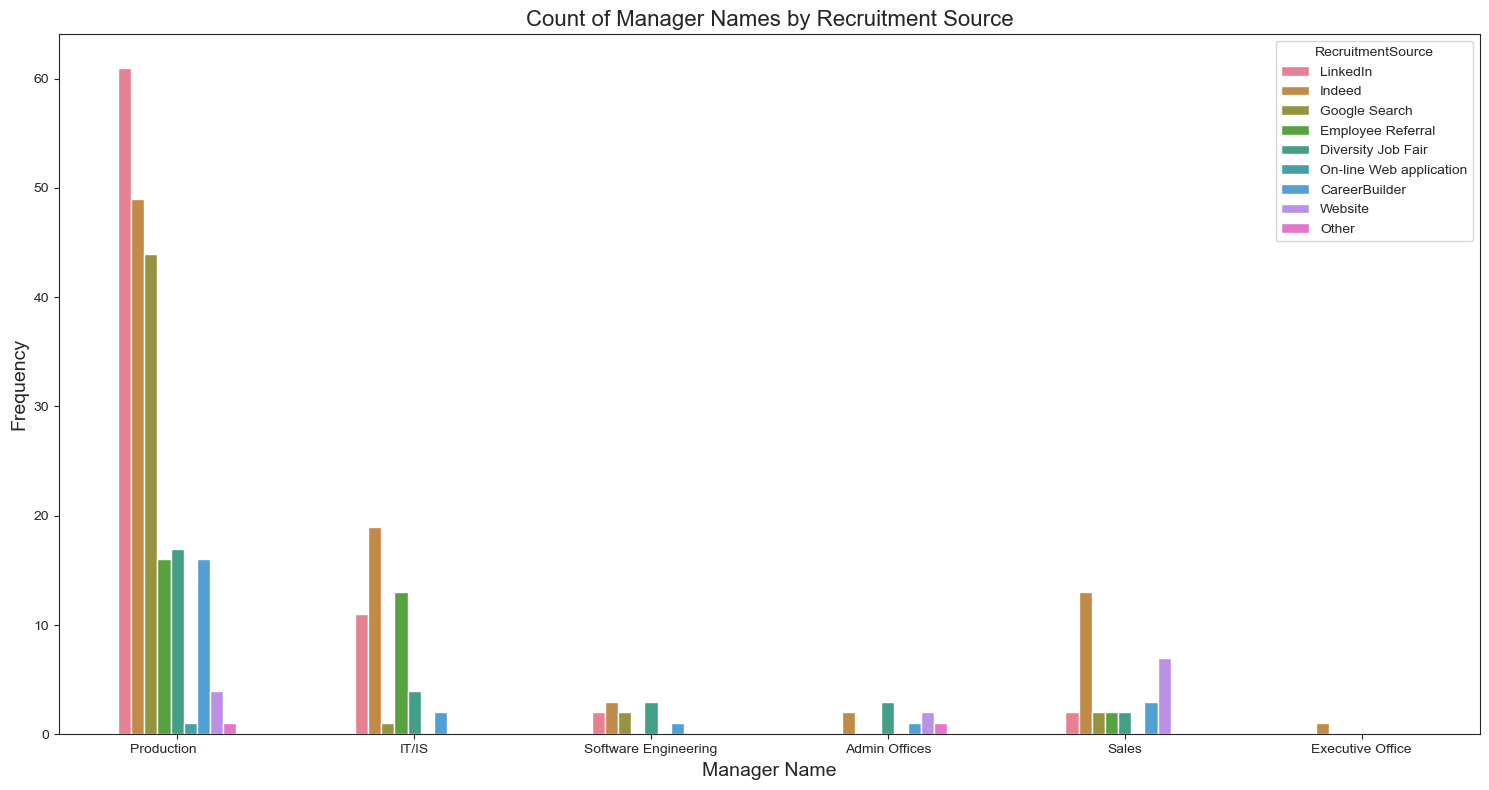

In [41]:
plt.figure(figsize=(15,8))
sns.set_style("ticks")
# Create a count plot with thicker bars
sns.countplot(x=df["Department"], hue=df["RecruitmentSource"], width=0.5)  # Adjust width here
# Set labels and title
plt.xlabel('Manager Name', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Count of Manager Names by Recruitment Source', fontsize=16)
# Show the plot
plt.tight_layout()  # Adjusts the plot to fit into the figure area
plt.show()

# **Data Transformation and Feature selection**

# **Lets Select Important Features and then Convert or transform Categorical features to Numericals**

In [42]:
df_copy = df.copy() #Copy of Original dataframe
df_copy.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

# **Most features for model training**

`To Predict employee leave a company or not.`


In [43]:
important_features=df_copy[["Employee_Name" , 
                            "GenderID" ,"Salary" 
                            ,"Termd" ,"Position" ,
                              "State" ,"DOB" ,"DateofHire" ,
                              "DateofTermination" ,
                              "PerformanceScore" ,
                              "EngagementSurvey" ,
                              "EmpSatisfaction" ,
                              "Absences" , "ManagerName", "Zip" ,
                              "SpecialProjectsCount" ,
                              "HispanicLatino","Department" ,
                              'MarriedID']]

In [44]:
important_features

,Employee_Name,GenderID,Salary,Termd,Position,State,DOB,DateofHire,DateofTermination,PerformanceScore,EngagementSurvey,EmpSatisfaction,Absences,ManagerName,Zip,SpecialProjectsCount,HispanicLatino,Department,MarriedID
0,"Adinolfi, Wilson K",1,62506,0,Production Technician I,MA,07/10/83,7/5/2011,NaN,Exceeds,4.60,5,1,Michael Albert,1960,0,No,Production,0
1,"Ait Sidi, Karthikeyan",1,104437,1,Sr. DBA,MA,05/05/75,3/30/2015,6/16/2016,Fully Meets,4.96,3,17,Simon Roup,2148,6,No,IT/IS,1
2,"Akinkuolie, Sarah",0,64955,1,Production Technician II,MA,09/19/88,7/5/2011,9/24/2012,Fully Meets,3.02,3,3,Kissy Sullivan,1810,0,No,Production,1
3,"Alagbe,Trina",0,64991,0,Production Technician I,MA,09/27/88,1/7/2008,NaN,Fully Meets,4.84,5,15,Elijiah Gray,1886,0,No,Production,1
4,"Anderson, Carol",0,50825,1,Production Technician I,MA,09/08/89,7/11/2011,9/6/2016,Fully Meets,5.00,4,2,Webster Butler,2169,0,No,Production,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",1,65893,0,Production Technician II,MA,05/11/85,7/7/2014,NaN,Fully Meets,4.07,4,13,Kissy Sullivan,1810,0,No,Production,0
307,"Ybarra, Catherine",0,48513,1,Production Technician I,MA,05/04/82,9/2/2008,9/29/2015,PIP,3.20,2,4,Brannon Miller,2458,0,No,Production,0
308,"Zamora, Jennifer",0,220450,0,CIO,MA,08/30/79,4/10/2010,NaN,Exceeds,4.60,5,16,Janet King,2067,6,No,IT/IS,0
309,"Zhou, Julia",0,89292,0,Data Analyst,MA,02/24/79,3/30/2015,NaN,Fully Meets,5.00,3,11,Simon Roup,2148,5,No,IT/IS,0


# **Unecessary columns**

In [45]:
not_important_features = [ column for column in df_copy.columns if column not in important_features]

In [46]:
not_important_features
df_copy[not_important_features]

,EmpID,MaritalStatusID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PositionID,Sex,MaritalDesc,CitizenDesc,RaceDesc,TermReason,EmploymentStatus,ManagerID,RecruitmentSource,LastPerformanceReview_Date,DaysLateLast30
0,10026,0,1,5,4,0,19,M,Single,US Citizen,White,N/A-StillEmployed,Active,22.0,LinkedIn,1/17/2019,0
1,10084,1,5,3,3,0,27,M,Married,US Citizen,White,career change,Voluntarily Terminated,4.0,Indeed,2/24/2016,0
2,10196,1,5,5,3,0,20,F,Married,US Citizen,White,hours,Voluntarily Terminated,20.0,LinkedIn,5/15/2012,0
3,10088,1,1,5,3,0,19,F,Married,US Citizen,White,N/A-StillEmployed,Active,16.0,Indeed,1/3/2019,0
4,10069,2,5,5,3,0,19,F,Divorced,US Citizen,White,return to school,Voluntarily Terminated,39.0,Google Search,2/1/2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,10135,0,1,5,3,0,20,M,Single,US Citizen,White,N/A-StillEmployed,Active,20.0,LinkedIn,2/28/2019,0
307,10301,0,5,5,1,0,19,F,Single,US Citizen,Asian,Another position,Voluntarily Terminated,12.0,Google Search,9/2/2015,5
308,10010,0,1,3,4,0,6,F,Single,US Citizen,White,N/A-StillEmployed,Active,2.0,Employee Referral,2/21/2019,0
309,10043,0,1,3,3,0,9,F,Single,US Citizen,White,N/A-StillEmployed,Active,4.0,Employee Referral,2/1/2019,0


In [47]:
df_copy.drop(not_important_features, axis=1 , inplace=True) #Lets drop unnecessary column 

# **Data Transformation**

`Lets Apply One-hot-encoder for Nominal features.`

In [48]:
df_copy.head(2) 

,Employee_Name,MarriedID,GenderID,Salary,Termd,Position,State,Zip,DOB,HispanicLatino,DateofHire,DateofTermination,Department,ManagerName,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Absences
0,"Adinolfi, Wilson K",0,1,62506,0,Production Technician I,MA,1960,07/10/83,No,7/5/2011,NaN,Production,Michael Albert,Exceeds,4.60,5,0,1
1,"Ait Sidi, Karthikeyan",1,1,104437,1,Sr. DBA,MA,2148,05/05/75,No,3/30/2015,6/16/2016,IT/IS,Simon Roup,Fully Meets,4.96,3,6,17


In [49]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming df_copy is your original DataFrame
# Specify the columns you want to encode
nominal_features = ['Employee_Name', 'Position', 'Department', 'ManagerName', 'PerformanceScore']

# Create an instance of OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the specified nominal features
encoded_features = one_hot_encoder.fit_transform(df_copy[nominal_features])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(nominal_features))

# Concatenate the original DataFrame (without the nominal features) with the new encoded DataFrame
df_encoded = pd.concat([df_copy.drop(columns=nominal_features).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Display the resulting DataFrame
print(df_encoded)


     MarriedID  GenderID  Salary  Termd State   Zip       DOB HispanicLatino  \
0            0         1   62506      0    MA  1960  07/10/83             No   
1            1         1  104437      1    MA  2148  05/05/75             No   
2            1         0   64955      1    MA  1810  09/19/88             No   
3            1         0   64991      0    MA  1886  09/27/88             No   
4            0         0   50825      1    MA  2169  09/08/89             No   
..         ...       ...     ...    ...   ...   ...       ...            ...   
306          0         1   65893      0    MA  1810  05/11/85             No   
307          0         0   48513      1    MA  2458  05/04/82             No   
308          0         0  220450      0    MA  2067  08/30/79             No   
309          0         0   89292      0    MA  2148  02/24/79             No   
310          0         0   45046      0    MA  1730  08/17/78             No   

    DateofHire DateofTermination  ...  

In [50]:
df_encoded.head()

,MarriedID,GenderID,Salary,Termd,State,Zip,DOB,HispanicLatino,DateofHire,DateofTermination,...,ManagerName_Kissy Sullivan,ManagerName_Lynn Daneault,ManagerName_Michael Albert,ManagerName_Peter Monroe,ManagerName_Simon Roup,ManagerName_Webster Butler,PerformanceScore_Exceeds,PerformanceScore_Fully Meets,PerformanceScore_Needs Improvement,PerformanceScore_PIP
0,0,1,62506,0,MA,1960,07/10/83,No,7/5/2011,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,104437,1,MA,2148,05/05/75,No,3/30/2015,6/16/2016,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,64955,1,MA,1810,09/19/88,No,7/5/2011,9/24/2012,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0,64991,0,MA,1886,09/27/88,No,1/7/2008,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,50825,1,MA,2169,09/08/89,No,7/11/2011,9/6/2016,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [51]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df_encoded["State"]= encoder.fit_transform(df_encoded["State"])
df_encoded["HispanicLatino"]= encoder.fit_transform(df_encoded["HispanicLatino"])

In [52]:
df_encoded[["State" ,"HispanicLatino"]].nunique()

State             28
HispanicLatino     4
dtype: int64

# **Lets Calculate age with DOB**

In [53]:
from datetime import datetime

# Step 1: Convert the 'DOB' column to datetime
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%m/%d/%y')
    except:
        try:
            return pd.to_datetime(date_str, format='%m-%d-%Y')
        except:
            return pd.NaT  # Return Not a Time for any unparseable dates

df_encoded['DOB'] = df_encoded['DOB'].apply(parse_date)

# Step 2: Calculate age as of 2021
reference_date = pd.Timestamp('2024-10-1')  # You can adjust this date if needed

def calculate_age(born):
    if pd.isnull(born):
        return None
    return reference_date.year - born.year - ((reference_date.month, reference_date.day) < (born.month, born.day))

df_encoded['Age'] = df_encoded['DOB'].apply(calculate_age)

# Step 3: Handle any potential negative ages (for dates after 2021)
df_encoded.loc[df_encoded['Age'] < 0, 'Age'] = 0

# Print the first few rows to verify
print(df_encoded[['DOB', 'Age']].head())

         DOB  Age
0 1983-07-10   41
1 1975-05-05   49
2 1988-09-19   36
3 1988-09-27   36
4 1989-09-08   35


In [54]:
df_encoded["DOB"].dt.year.unique()

array([1983, 1975, 1988, 1989, 1977, 1979, 1970, 1974, 1981, 2066, 1986,
       2058, 1990, 2067, 2064, 1987, 1969, 1980, 2063, 2051, 1972, 1985,
       1978, 2065, 2052, 1982, 1973, 1991, 2055, 2068, 1971, 1992, 1984,
       1976, 2059, 2054, 2061, 2053])

In [55]:
df_encoded["Age"].unique()

array([41, 49, 36, 35, 47, 45, 54, 50, 42,  0, 53, 38, 34, 37, 44, 52, 39,
       43, 48, 46, 51, 33, 40, 32, 55], dtype=int64)

In [56]:
def parse_date(date_str):
    try:
        dt = pd.to_datetime(date_str, format='%m/%d/%y')
        # If the year is after 2024, assume it's actually 100 years earlier
        if dt.year > 2024:
            dt = dt.replace(year=dt.year - 100)
        return dt
    except:
        try:
            return pd.to_datetime(date_str, format='%m-%d-%Y')
        except:
            print(f"Failed to parse date: {date_str}")  # Debug print
            return pd.NaT

df_encoded['DOB'] = df_encoded['DOB'].apply(parse_date)

reference_date = pd.Timestamp('2024-10-1')

def calculate_age(born):
    if pd.isnull(born):
        print(f"Null birthdate encountered")  # Debug print
        return None
    age = reference_date.year - born.year - ((reference_date.month, reference_date.day) < (born.month, born.day))
    return age

df_encoded['Age'] = df_encoded['DOB'].apply(calculate_age)

# Print summary statistics
print(df_encoded['Age'].value_counts())
print(f"Number of zero ages: {(df_encoded['Age'] == 0).sum()}")

Age
41    20
45    20
36    20
37    20
38    16
40    16
39    15
35    14
47    12
54    11
44    11
49    11
42    10
43    10
51     9
50     9
46     8
34     8
48     8
59     6
55     6
52     6
56     6
57     5
60     5
53     4
65     3
72     3
58     3
33     3
32     3
73     2
69     2
61     2
70     1
63     1
71     1
68     1
Name: count, dtype: int64
Number of zero ages: 0


In [57]:
# Function to parse date strings using various formats
def parse_date_v2(date_str):
    if pd.isna(date_str):
        return pd.NaT
    
    # Attempt parsing with multiple formats
    parsed_date = pd.to_datetime(date_str, errors='coerce')
    
    # If year is greater than 2021, adjust it to be 100 years earlier
    if parsed_date.year > 2024:
        parsed_date = parsed_date.replace(year=parsed_date.year - 100)
    
    return parsed_date

# Apply the parsing function to the DateofHire and DateofTermination columns
df_encoded['DateofHire'] = df_encoded['DateofHire'].apply(parse_date_v2)
df_encoded['DateofTermination'] = df_encoded['DateofTermination'].apply(parse_date_v2)

# Define a reference date for tenure calculation
reference_date = pd.Timestamp('2024-10-30')

# Function to calculate tenure
def calculate_tenure_v2(row):
    if pd.isna(row['DateofHire']):
        return None
    
    # Calculate tenure based on termination status
    if row['Termd'] == 1 and not pd.isna(row['DateofTermination']):
        tenure = (row['DateofTermination'] - row['DateofHire']).days / 365.25
    else:
        tenure = (reference_date - row['DateofHire']).days / 365.25
    
    return max(tenure, 0)  # Ensure tenure is not negative

# Apply the tenure calculation function
df_encoded['Tenure'] = df_encoded.apply(calculate_tenure_v2, axis=1)

# Print summary statistics for the Tenure column
print(df_encoded['Tenure'].describe())

# Print a few sample rows to verify
print("\nSample rows:")
print(df_encoded[['DateofHire', 'DateofTermination', 'Termd', 'Tenure']].sample(10))

# Check for any remaining issues with NaN tenure
print("\nRows with NaN Tenure:")
print(df_encoded[df_encoded['Tenure'].isna()][['DateofHire', 'DateofTermination', 'Termd', 'Tenure']])

# Check for rows with zero tenure
print("\nRows with zero Tenure:")
print(df_encoded[df_encoded['Tenure'] == 0][['DateofHire', 'DateofTermination', 'Termd', 'Tenure']])


count    311.000000
mean       8.598330
std        4.144416
min        0.071184
25%        4.962355
50%        9.971253
75%       11.312799
max       18.806297
Name: Tenure, dtype: float64

Sample rows:
    DateofHire DateofTermination  Termd     Tenure
251 2013-09-30               NaT      0  11.082820
220 2014-11-10               NaT      0   9.971253
232 2011-11-28               NaT      0  12.922656
100 2015-03-30               NaT      0   9.587953
154 2011-01-10               NaT      0  13.804244
196 2013-07-08               NaT      0  11.312799
178 2011-07-05        2012-08-19      1   1.125257
219 2012-04-02               NaT      0  12.577687
14  2012-09-24        2017-04-06      1   4.531143
166 2012-04-30               NaT      0  12.501027

Rows with NaN Tenure:
Empty DataFrame
Columns: [DateofHire, DateofTermination, Termd, Tenure]
Index: []

Rows with zero Tenure:
Empty DataFrame
Columns: [DateofHire, DateofTermination, Termd, Tenure]
Index: []


In [58]:
df_encoded["Tenure"].value_counts()

Tenure
9.587953     11
10.086242    10
9.817933      8
9.971253      8
11.082820     8
             ..
2.436687      1
0.646133      1
0.158795      1
8.399726      1
14.557153     1
Name: count, Length: 191, dtype: int64

In [59]:
df_encoded

,MarriedID,GenderID,Salary,Termd,State,Zip,DOB,HispanicLatino,DateofHire,DateofTermination,...,ManagerName_Michael Albert,ManagerName_Peter Monroe,ManagerName_Simon Roup,ManagerName_Webster Butler,PerformanceScore_Exceeds,PerformanceScore_Fully Meets,PerformanceScore_Needs Improvement,PerformanceScore_PIP,Age,Tenure
0,0,1,62506,0,10,1960,1983-07-10,0,2011-07-05,NaT,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41,13.322382
1,1,1,104437,1,10,2148,1975-05-05,0,2015-03-30,2016-06-16,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,49,1.215606
2,1,0,64955,1,10,1810,1988-09-19,0,2011-07-05,2012-09-24,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,36,1.223819
3,1,0,64991,0,10,1886,1988-09-27,0,2008-01-07,NaT,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,36,16.813142
4,0,0,50825,1,10,2169,1989-09-08,0,2011-07-11,2016-09-06,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,35,5.158111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,1,65893,0,10,1810,1985-05-11,0,2014-07-07,NaT,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,10.316222
307,0,0,48513,1,10,2458,1982-05-04,0,2008-09-02,2015-09-29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42,7.071869
308,0,0,220450,0,10,2067,1979-08-30,0,2010-04-10,NaT,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,45,14.557153
309,0,0,89292,0,10,2148,1979-02-24,0,2015-03-30,NaT,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,45,9.587953


In [60]:
df_encoded.drop(["DateofTermination" ,"DOB" ,"DateofHire" ] , axis=1 , inplace=True)


In [61]:
df_encoded.head()

,MarriedID,GenderID,Salary,Termd,State,Zip,HispanicLatino,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,...,ManagerName_Michael Albert,ManagerName_Peter Monroe,ManagerName_Simon Roup,ManagerName_Webster Butler,PerformanceScore_Exceeds,PerformanceScore_Fully Meets,PerformanceScore_Needs Improvement,PerformanceScore_PIP,Age,Tenure
0,0,1,62506,0,10,1960,0,4.60,5,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41,13.322382
1,1,1,104437,1,10,2148,0,4.96,3,6,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,49,1.215606
2,1,0,64955,1,10,1810,0,3.02,3,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,36,1.223819
3,1,0,64991,0,10,1886,0,4.84,5,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,36,16.813142
4,0,0,50825,1,10,2169,0,5.00,4,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,35,5.158111


# **Lets start Model training our data is fully cleaned**

`Before starting model training lets first observe data is fully Balanced or not.`

In [62]:
# Independent and Dependent Features

X= df_encoded.drop("Termd" , axis=1)
y=df_encoded['Termd']

y.value_counts()


Termd
0    207
1    104
Name: count, dtype: int64

# **Target Features is not fully Balanced** 

` I will use SMOTE(Synthetic Minority Over-sampling Technique) `

In [63]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_resample , y_resample = smote.fit_resample(X , y)

y_resample.value_counts()

Termd
0    207
1    207
Name: count, dtype: int64

# **Features look fully Balanced**

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)

# Define the models to be trained
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Initialize an empty list to store results
results = []

# Train each model and evaluate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append the results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Print the results
print(results_df)


                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.987952   1.000000  0.972222  0.985915
1           Random Forest  1.000000   1.000000  1.000000  1.000000
2  Support Vector Machine  0.481928   0.454545  0.972222  0.619469
3           Decision Tree  1.000000   1.000000  1.000000  1.000000
4     K-Nearest Neighbors  0.626506   0.555556  0.694444  0.617284


ROC AUC: 1.0000

Feature Importances:
     Feature  Importance
385      385    0.827754
376      376    0.047325
8          8    0.039639
2          2    0.034277
9          9    0.016861
..       ...         ...
130      130    0.000000
129      129    0.000000
128      128    0.000000
127      127    0.000000
193      193    0.000000

[386 rows x 2 columns]


<Figure size 1000x600 with 0 Axes>

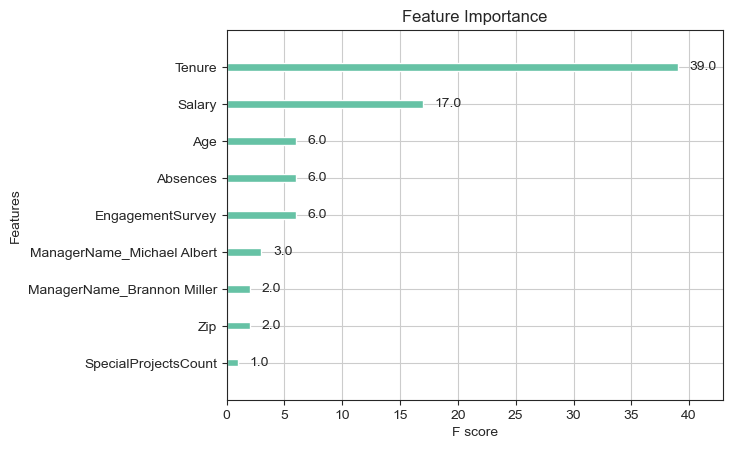

In [65]:
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import roc_auc_score  

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {roc_auc:.4f}')

# Extract feature importances
feature_importances = xgb_model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': range(X.shape[1]),
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("\nFeature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight', max_num_features=10, title='Feature Importance', xlabel='F score', ylabel='Features')
plt.show()


# **HyperParameter Tuning**

In [66]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report


#Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='roc_auc', cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Generate a classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Compile results into a DataFrame
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [
        report['accuracy'],
        report['1']['precision'],
        report['1']['recall'],
        report['1']['f1-score'],
        roc_auc
    ]
})

# Display results
print("Best Parameters from Grid Search:")
print(grid_search.best_params_)
print("\nModel Evaluation Scores:")
print(results_df)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters from Grid Search:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

Model Evaluation Scores:
      Metric     Score
0   Accuracy  0.987952
1  Precision  1.000000
2     Recall  0.972222
3   F1 Score  0.985915
4    ROC AUC  0.999409


Train Accuracy : 0.9919354838709677
Test Accuracy : 0.9841269841269841
      Metric     Score
0  Precision  1.000000
1     Recall  0.954545
2   F1 Score  0.976744
3    ROC AUC  1.000000


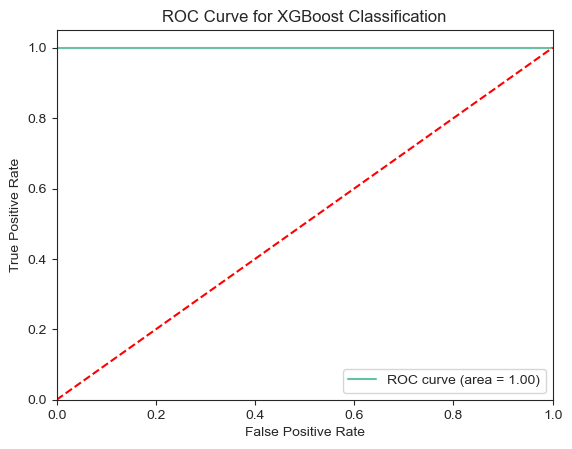

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve , auc

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = XGBClassifier()

# Set up the grid search for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Retrieve the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on training and testing sets
train_predict = best_model.predict(X_train)
test_predict = best_model.predict(X_test)
test_proba = best_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

#observe overfitting and Underfitting
train_predict = best_model.predict(X_train)

print(f"Train Accuracy : {accuracy_score(y_train , train_predict)}")
print(f"Test Accuracy : {accuracy_score(y_test , test_predict)}")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, test_predict)
precision = precision_score(y_test, test_predict)
recall = recall_score(y_test, test_predict)
f1 = f1_score(y_test, test_predict)
roc_auc = roc_auc_score(y_test, test_proba)

# Print model evaluation scores
scores_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [ precision, recall, f1, roc_auc]
})

print(scores_df)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, test_proba) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--' , color="Red")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classification')
plt.legend()
plt.show()